In [ ]:
"""

Introdução à User Story: Compreendendo o Uso do Parque por Grupos Etários

Como um GSM (Funcionário de Gestão do Parque), tenho como objetivo obter insights abrangentes sobre os padrões de utilização do nosso parque, discernindo tendências entre diferentes demografias etárias. Para alcançar isso, integramos uma pesquisa de três perguntas dentro do nosso portal de usuário.

Faixa Etária: Os usuários são solicitados a especificar seu grupo etário, categorizando-se como crianças (até 15 anos), adultos (entre 16 e 65 anos) ou idosos (mais de 65 anos).
Recomendação: Os participantes indicam se recomendariam o parque para outros, com uma simples resposta 'Sim' ou 'Não'.
Frequência de Visitas ao Parque: Os usuários quantificam suas visitas mensais ao parque com uma entrada numérica.
Ao agregar respostas dessas perguntas da pesquisa, obtemos insights valiosos sobre os padrões de uso do parque segmentados por grupos etários. Especificamente, podemos determinar:

A distribuição de recomendações de parque entre diferentes demografias etárias.
Proporções de usuários de cada faixa etária que endossam o parque.
Análise da frequência de visitas ao parque em diferentes grupos etários.
Essa compreensão abrangente capacita a gestão do parque a adaptar comodidades, serviços e esforços de divulgação para melhor atender às diversas necessidades dos visitantes do nosso parque.

"""


Tipos de variáveis
Idade:
Escalao
3    187
2    182
1    131
Name: count, dtype: int64

Recomendaria o parque para outros:
Y/N
N    254
Y    246
Name: count, dtype: int64

Frequência de visitas ao parque por mês:
count    500.00000
mean       4.92600
std        2.90334
min        1.00000
25%        2.00000
50%        5.00000
75%        7.00000
max       12.00000
Name: Visits, dtype: float64

Proporção de usuários de cada faixa etária que recomendaria o parque:
Escalao
1    0.473282
2    0.543956
3    0.454545
Name: proportion, dtype: float64

Proporção de usuários de cada faixa etária que recomendaria o parque:
Escalao
1    0.473282
2    0.543956
3    0.454545
dtype: float64


<Figure size 800x600 with 0 Axes>

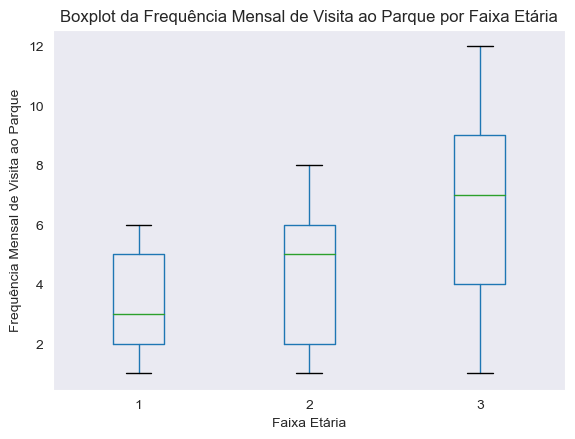

In [14]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura do arquivo CSV
df = pd.read_csv("../datasetsMATCP/Inquiry.csv", delimiter=';')

# 1- Indicação do tipo de cada uma das três variáveis
print("Tipos de variáveis")
print("Idade:")
print(df['Escalao'].value_counts())
print("\nRecomendaria o parque para outros:")
print(df['Y/N'].value_counts())
print("\nFrequência de visitas ao parque por mês:")
print(df['Visits'].describe())

# 2- Proporção de usuários de cada faixa etária que recomendaria o parque
recommendation_counts = df.groupby('Escalao')['Y/N'].value_counts(normalize=True)[:, 'Y']
print("\nProporção de usuários de cada faixa etária que recomendaria o parque:")
print(recommendation_counts)

# 2- Indicar a proporção de usuários de cada faixa etária que recomendaria o parque
recommendation_counts = df.groupby('Escalao')['Y/N'].value_counts(normalize=True, sort=False).unstack()
proportion_recommend = recommendation_counts['Y'] / recommendation_counts.sum(axis=1)
print("\nProporção de usuários de cada faixa etária que recomendaria o parque:")
print(proportion_recommend)


# 3- Criação de boxplot para cada faixa etária, referente à frequência mensal de uso do parque
plt.figure(figsize=(8, 6))
df.boxplot(column='Visits', by='Escalao', grid=False)
plt.title('Boxplot da Frequência Mensal de Visita ao Parque por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Frequência Mensal de Visita ao Parque')
plt.suptitle('')
plt.show()

In [ ]:
"""
Tipos de Variáveis:
Observamos que a variável "Idade" (Escalão) é dividida em três categorias: crianças (1), adultos (2) e idosos (3).
A variável "Recomendaria o parque para outros" (Y/N) é binária, com valores 'Sim' (Y) e 'Não' (N).
A frequência de visitas ao parque por mês (Visits) é uma variável numérica contínua.

Recomendação do Parque:
Notamos que há uma quase equivalência na proporção de usuários que recomendariam o parque para outros, com 246 usuários (49.2%) indicando 'Sim' (Y) e 254 usuários (50.8%) indicando 'Não' (N).

Frequência de Visitas ao Parque:
A análise da frequência de visitas ao parque revela que, em média, os participantes realizam aproximadamente 4.93 visitas por mês, com um desvio padrão de 2.90.
A mediana (valor central) da frequência de visitas é de 5 visitas por mês, sugerindo uma distribuição relativamente equilibrada das frequências.

Proporção de Usuários por Faixa Etária que Recomendaria o Parque:
Ao examinarmos a proporção de usuários de cada faixa etária que recomendaria o parque, observamos que a faixa etária de adultos (2) apresenta a maior proporção de recomendação, com aproximadamente 54.4%, seguida pela faixa etária de crianças (1) com 47.3% e pela faixa etária de idosos (3) com 45.5%.

Análise do Gráfico de Frequência de Visitas por Faixa Etária:
O gráfico sugere que, em média, os idosos realizam mais visitas ao parque do que os adultos, e estes, por sua vez, realizam mais visitas do que as crianças.
Essa tendência pode indicar diferentes padrões de uso do parque por faixa etária, o que pode ser útil para orientar estratégias de gestão e marketing direcionadas a públicos específicos.
"""